In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, model_selection

In [2]:
df = pd.read_csv("Cars93.csv")

In [3]:
df.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [4]:
y = df.Price.values
xfeatures = ['MPG.city', 'MPG.highway', 'EngineSize','Horsepower', 'RPM', 'Rev.per.mile',   'Fuel.tank.capacity', 'Passengers', 'Length',   'Wheelbase', 'Width', 'Turn.circle', 'Weight']

In [5]:
loo = model_selection.LeaveOneOut()
loo.get_n_splits(df[xfeatures])

93

In [11]:
lambdas = np.logspace(-3,-1,100)
# print('lambdas',lambdas)
CV = []
coefs = []

for lamb in lambdas:
    error = 0
    coef = 0
    for train_index, test_index in loo.split(df[xfeatures]):

        X_train, X_test = df[xfeatures].iloc[train_index], df[xfeatures].iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf = linear_model.Lasso(alpha=lamb,normalize = True)
        clf.fit(X_train,y_train)
        
        coef += clf.coef_
    
        error += (clf.predict(X_test)-y_test)**2
    
    coef/=loo.get_n_splits(df[xfeatures])
    error/= loo.get_n_splits(df[xfeatures])
    
    coefs.append(coef)
    CV.append(error[0])
CV = np.array(CV)
    
    
    
    

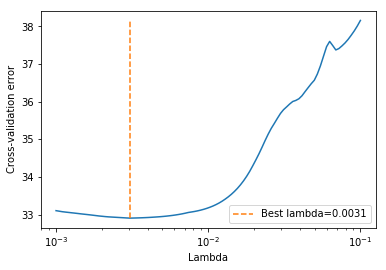

In [12]:
plt.semilogx(lambdas,CV)
plt.xlabel("Lambda")
plt.ylabel("Cross-validation error")
bestLambda = lambdas[CV==min(CV)][0]
plt.plot([bestLambda,bestLambda],[min(CV),max(CV)],linestyle = '--',label = 'Best lambda={:.4f}'.format(bestLambda))
plt.legend()

Text(0,0.5,'Coefficient value')

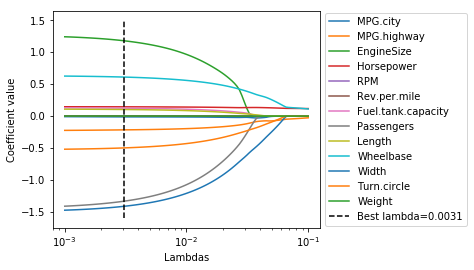

In [13]:
fig = plt.figure()
ax = plt.subplot(111)

coefs = np.array(coefs)
for i in range(len(xfeatures)):
    ax.semilogx(lambdas,coefs[:,i],label = xfeatures[i])
ax.plot([bestLambda,bestLambda],[-1.6,1.5],linestyle = '--',label = 'Best lambda={:.4f}'.format(bestLambda),c='black')
# plt.legend()

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Lambdas")
plt.ylabel("Coefficient value")

In [14]:
clf = linear_model.Lasso(alpha=bestLambda,normalize = True)

clf.fit(df[xfeatures],y)

print(clf.coef_)

[-3.70794385e-04 -2.26389742e-01  1.17292378e+00  1.45520075e-01
 -2.11665236e-03  2.38587081e-03  1.26493363e-01 -1.33923721e+00
  1.04360100e-01  6.13178761e-01 -1.41531844e+00 -4.98322782e-01
  6.21661829e-04]


In [15]:
xfeatures = np.array(xfeatures)
xfeatures[abs(clf.coef_)>0.5]

array(['EngineSize', 'Passengers', 'Wheelbase', 'Width'], dtype='<U18')

## Las features que mas influencia tienen son:  'EngineSize', 'Passengers', 'Wheelbase', 'Width'